In [1]:
source('~/pycharmprojects/nyu-research/ts.R')


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.2 



In [2]:
time_index <- function(df){
  #indexes a dataframe by 30 days and 24 hours
  
  times = data.frame()
  for (d in 1:30){
    for (h in 0:23){
      times = rbind(times, c(d, h, 0))
    }
  }
  colnames(times) = c('day', 'hour', 'tweets')
  colnames(df) = c('day', 'hour', 'tweets')
  merged = merge(times, df, by=c('day', 'hour'), all='TRUE')
  merged[is.na(merged)] = 0
  merged['tweets'] = pmax(merged$tweets.x,merged$tweets.y)
  return (merged)
}

In [3]:
preprocessing_df <- function(ts, total, thres=5000){
  
  # removes rows with low observations and locfs them
  # returns time series and total time series, as a list
  
  df = time_index(data.frame(ts))
  df_total = time_index(data.frame(total))
  
  missing = df_total[,'tweets']<thres
  print(which(missing))
  df_total[missing, 'tweets'] <- NA
  df[missing,] <-NA
  df_total = na.locf(df_total[,'tweets'])
  df_filled = (na.locf(df[, ncol(df)]))
  
  return(list(series=df_filled, total=df_total))
}

In [4]:
w_alc_cut <- read.csv('~/documents/summary/casual.csv')

In [5]:
head(w_alc_cut)

day,hour,sum,len
2,9,0,14
2,10,5,2414
2,11,19,9379
2,12,16,10751
2,13,40,33520
2,14,44,38579


In [6]:
new_cas <- w_alc_cut[c(1,2,3)]
new_tot <- w_alc_cut[c(1,2,4)]

In [7]:
new <- preprocessing_df(new_cas, new_tot)

 [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
[20]  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  75  76  77
[39] 100 101 102 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
[58] 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 172 173 174
[77] 340 341 342 435 436 437 438 532 533 716 717 718 719 720


In [8]:
new_perc <- ts((new$series/new$total)[1:672], frequency=24)

In [9]:
june = preprocessing('~/pycharmprojects/nyu-research/twitter_tsa/data/june/june_casual.csv', '~/pycharmprojects/nyu-research/twitter_tsa/data/june/june_total.csv')

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [10]:
old_perc <- ts((june$series/june$total)[36:(672+36)], frequency=24)

In [11]:
new.1 = as.numeric(window(new_perc, start=c(1, 1), end= c(7, 24)))
new.2 = as.numeric(window(new_perc, start=c(8, 1), end= c(14, 24)))
new.3 = as.numeric(window(new_perc, start=c(15, 1), end= c(21, 24)))
new.4 = as.numeric(window(new_perc, start=c(22, 1), end= c(28, 24)))
old.1 = as.numeric(window(old_perc, start=c(1, 1), end= c(7, 24)))
old.2 = as.numeric(window(old_perc, start=c(8, 1), end= c(14, 24)))
old.3 = as.numeric(window(old_perc, start=c(15, 1), end= c(21, 24)))
old.4 = as.numeric(window(old_perc, start=c(22, 1), end= c(28, 24)))

In [12]:
weeks = data.frame(new.1, new.2, new.3, new.4, old.1, old.2, old.3, old.4)

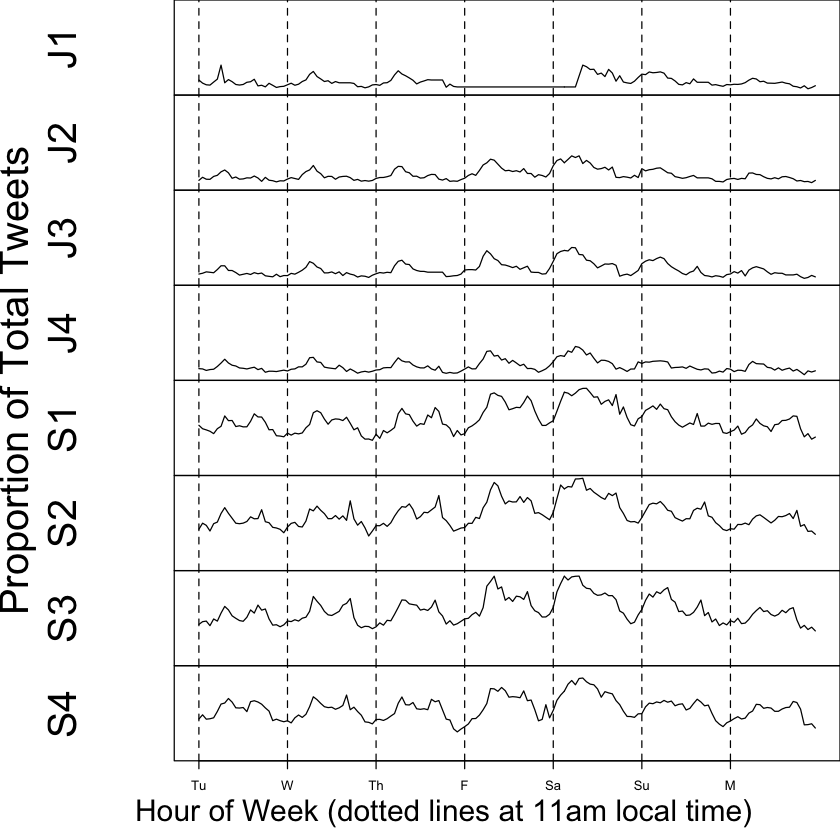

In [13]:
plot_weeks <- function(){
#     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
    week_names = c('J1', 'J2', 'J3', 'J4', 'S1', 'S2', 'S3', 'S4')
par(mfrow=c(8,1))
# outer margin
par(oma = c(5, 3, 0, 0))

shade_color <- rgb(0, 0, 190, alpha=50, maxColorValue=255)
for (col in 1:8){
    # remove space for x-axis
    par(mar = c(0, 8, 0, 0))
    yrange = c(0.000, 0.0155)
    plot(weeks[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
    title(cex.lab =3, ylab=week_names[col], line=6)
    # axis(2, labels = c('0.02', '0.014'), at=c(0.02, 0.014), las = 1, cex.axis=2)
    abline(v=seq(1, 168, by=24), lty=2)

}

mtext('Proportion of Total Tweets', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 11am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)

    
}
plot_weeks()